In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_to_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
index_to_word = dict([(value, key) for (key, value) in word_to_index.items()])

In [8]:
' '.join([index_to_word.get(i-3, '?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile('rmsprop', 'binary_crossentropy', ['accuracy'])

In [15]:
from keras import optimizers
from keras import losses
from keras import metrics

In [18]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 16s 59ms/step - loss: 0.7112 - binary_accuracy: 0.6537 - val_loss: 0.5619 - val_binary_accuracy: 0.7571
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3381 - binary_accuracy: 0.8657 - val_loss: 0.2858 - val_binary_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2053 - binary_accuracy: 0.9226 - val_loss: 0.3312 - val_binary_accuracy: 0.8734
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1557 - binary_accuracy: 0.9405 - val_loss: 0.4680 - val_binary_accuracy: 0.8415
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1303 - binary_accuracy: 0.9496 - val_loss: 0.6991 - val_binary_accuracy: 0.8017
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1167 - binary_accuracy: 0.9579 - val_loss: 0.4033 - val_binary_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - lo

In [21]:
history_dict = history.history

In [22]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [23]:
import matplotlib.pyplot as plt

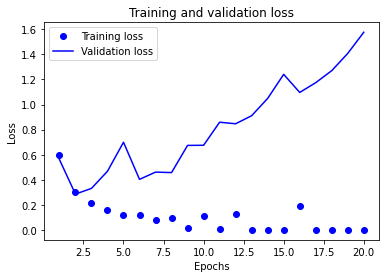

In [24]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

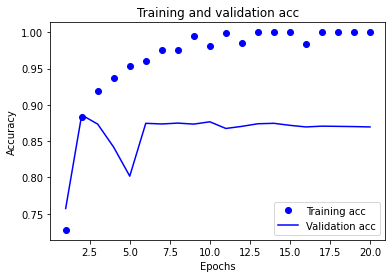

In [26]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5420 - accuracy: 0.7640
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2830 - accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2048 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3089 - accuracy: 0.8777


In [28]:
results

[0.30891653895378113, 0.8777199983596802]

In [29]:
model.predict(x_test)

array([[0.24018812],
       [0.99968255],
       [0.9582679 ],
       ...,
       [0.18548825],
       [0.11037636],
       [0.7374269 ]], dtype=float32)

In [30]:
from keras.datasets import reuters

In [31]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [36]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [37]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

565248/550378 [==============================] - 0s 0us/step


In [38]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [39]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [40]:
train_labels[10]

3

In [41]:
import numpy as np

In [42]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [44]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [45]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [46]:
model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [53]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 3.0755 - accuracy: 0.4341 - val_loss: 1.7397 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.5317 - accuracy: 0.6806 - val_loss: 1.3038 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.1039 - accuracy: 0.7662 - val_loss: 1.1126 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8407 - accuracy: 0.8230 - val_loss: 1.0328 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6764 - accuracy: 0.8554 - val_loss: 0.9538 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5273 - accuracy: 0.8933 - val_loss: 0.9236 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4350 - accuracy: 0.9156 - val_loss: 0.9475 - val_accuracy: 0.7920
Epoch 8/20
16

In [54]:
history_dict = history.history

In [56]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

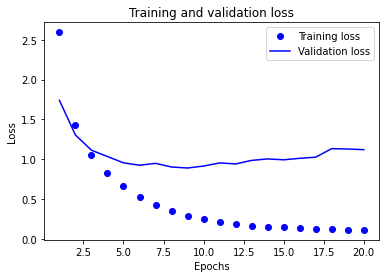

In [57]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

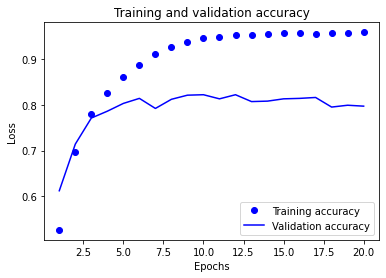

In [58]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 69ms/step - loss: 3.0756 - accuracy: 0.4227 - val_loss: 1.6868 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 1s 61ms/step - loss: 1.4737 - accuracy: 0.6972 - val_loss: 1.2942 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 53ms/step - loss: 1.0637 - accuracy: 0.7759 - val_loss: 1.1409 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8707 - accuracy: 0.8055 - val_loss: 1.0391 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6864 - accuracy: 0.8515 - val_loss: 0.9830 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5277 - accuracy: 0.8931 - val_loss: 0.9399 - val_accuracy: 0.8170
Epoch 7/9
16/16 [==============================] - 1s 65ms/step - loss: 0.4318 - accuracy: 0.9148 - val_loss: 0.8988 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [61]:
predictions = model.predict(x_test)

In [62]:
predictions[0].shape

(46,)

In [63]:
np.sum(predictions[0])

0.99999994

In [64]:
np.argmax(predictions[0])

3

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 3.6099 - accuracy: 0.2169 - val_loss: 3.0813 - val_accuracy: 0.4570
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 2.8839 - accuracy: 0.5038 - val_loss: 2.5556 - val_accuracy: 0.5600
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 2.3287 - accuracy: 0.6063 - val_loss: 2.1204 - val_accuracy: 0.6190
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 1.8884 - accuracy: 0.6598 - val_loss: 1.8312 - val_accuracy: 0.6470
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 1.6176 - accuracy: 0.6810 - val_loss: 1.6667 - val_accuracy: 0.6540
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4225 - accuracy: 0.6982 - val_loss: 1.5725 - val_accuracy: 0.6570
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 1.2863 - accuracy: 0.7111 - val_loss: 1.5133 - val_accuracy: 0.6660
Epoch 8/20
16

In [67]:
from keras.datasets import boston_housing

In [68]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [69]:
train_data.shape

(404, 13)

In [70]:
test_data.shape

(102, 13)

In [71]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [72]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [73]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile('rmsprop', 'mse', ['mae'])
    return model

In [76]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [77]:
np.mean(all_scores)

12.945228219032288

In [80]:

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    all_mae_histories.append(history.history['val_mae'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [82]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

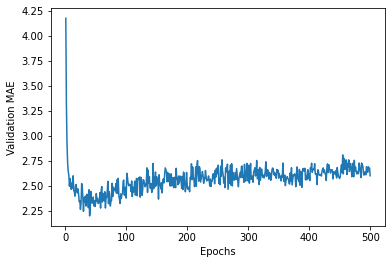

In [83]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

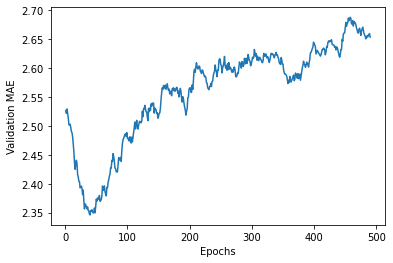

In [84]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [92]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.8313 - mae: 2.6275
